# PAMAP2 Veri Seti ile çalışılmış örnek bir kNN uygulaması

In [1]:
import numpy as np
import pandas as pd
from os import listdir
import os.path
import zipfile
import six.moves.urllib as urllib
import json
from sklearn import neighbors
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap

In [2]:
from os import listdir

In [3]:
ACTIVITIES_MAP = {
    0: 'no_activity',
    1: 'lying',
    2: 'sitting',
    3: 'standing',
    4: 'walking',
    5: 'running',
    6: 'cycling',
    7: 'nordic_walking',
    9: 'watching_tv',
    10: 'computer_work',
    11: 'car_driving',
    12: 'ascending_stairs',
    13: 'descending_stairs',
    16: 'vaccuum_cleaning',
    17: 'ironing',
    18: 'folding_laundry',
    19: 'house_cleaning',
    20: 'playing_soccer',
    24: 'rope_jumping'
}
def map_class(datasets_filled, exclude_activities):
    ysetall = [set(np.array(data.activityID)) - set(exclude_activities)
               for data in datasets_filled]
    class_ids = list(set.union(*[set(y) for y in ysetall]))
    class_labels = [ACTIVITIES_MAP[i] for i in class_ids]
    nr_classes = len(class_ids)
    mapclasses = {class_ids[i]: i for i in range(len(class_ids))}
    return class_labels, nr_classes, mapclasses

In [4]:
kolonlar = ['timestamp', 'activityID', 'heartrate', 'hand_temperature', 
                      'hand_acc_16g_x', 'hand_acc_16g_y', 'hand_acc_16g_z', 
                      'hand_acc_6g_x', 'hand_acc_6g_y', 'hand_acc_6g_z', 
                      'hand_gyroscope_x', 'hand_gyroscope_y', 'hand_gyroscope_z', 
                      'hand_magnometer_x', 'hand_magnometer_y', 'hand_magnometer_z', 
                      'hand_orientation_0', 'hand_orientation_1'
                      ,'hand_orientation_2', 
                      'hand_orientation_3', 'chest_temperature', 
                      'chest_acc_16g_x', 'chest_acc_16g_y', 'chest_acc_16g_z', 
                      'chest_acc_6g_x', 'chest_acc_6g_y', 'chest_acc_6g_z', 
                      'chest_gyroscope_x', 'chest_gyroscope_y', 'chest_gyroscope_z', 
                      'chest_magnometer_x', 'chest_magnometer_y', 'chest_magnometer_z', 
                      'chest_orientation_0', 'chest_orientation_1', 'chest_orientation_2', 
                      'chest_orientation_3', 'ankle_temperature', 'ankle_acc_16g_x', 
                      'ankle_acc_16g_y', 'ankle_acc_16g_z', 
                      'ankle_acc_6g_x', 'ankle_acc_6g_y', 'ankle_acc_6g_z', 
                      'ankle_gyroscope_x', 'ankle_gyroscope_y', 'ankle_gyroscope_z', 
                      'ankle_magnometer_x', 'ankle_magnometer_y', 'ankle_magnometer_z', 
                      'ankle_orientation_0', 'ankle_orientation_1', 'ankle_orientation_2', 'ankle_orientation_3']

columns_to_use = ['hand_acc_16g_x', 'hand_acc_16g_y', 'hand_acc_16g_z', 
                      'hand_acc_6g_x', 'hand_acc_6g_y', 'hand_acc_6g_z', 
                      'hand_gyroscope_x', 'hand_gyroscope_y', 'hand_gyroscope_z', 
                      'hand_magnometer_x', 'hand_magnometer_y', 'hand_magnometer_z', 
                      'chest_acc_16g_x', 'chest_acc_16g_y', 'chest_acc_16g_z', 
                      'chest_acc_6g_x', 'chest_acc_6g_y', 'chest_acc_6g_z', 
                      'chest_gyroscope_x', 'chest_gyroscope_y', 'chest_gyroscope_z', 
                      'chest_magnometer_x', 'chest_magnometer_y', 'chest_magnometer_z', 
                       'ankle_acc_16g_x', 
                      'ankle_acc_16g_y', 'ankle_acc_16g_z', 
                      'ankle_acc_6g_x', 'ankle_acc_6g_y', 'ankle_acc_6g_z', 
                      'ankle_gyroscope_x', 'ankle_gyroscope_y', 'ankle_gyroscope_z', 
                      'ankle_magnometer_x', 'ankle_magnometer_y', 'ankle_magnometer_z']



In [9]:
X=np.load('/Users/yusufalagoz/Desktop/normalizedFeatureDatabase.npy')
Y=np.load('/Users/yusufalagoz/Desktop/classTruthVect.npy')



In [11]:
X_train, X_test, y_train, y_test = train_test_split(X.T, Y, test_size=0.20, random_state=42)

In [12]:
k_Values=[1,3,5,7,11,13]

In [19]:
acc_Values=np.zeros(6)
index =0;
for k in k_Values:
    clf = neighbors.KNeighborsClassifier(k, weights='distance',n_jobs=-1)
    clf.fit(X_train, y_train)
    y_hat = clf.predict(X_test)
    acc = accuracy_score(y_test, y_hat)
    acc_Values[index]=acc
    index = index+1

In [20]:
indexOfAccValues = np.argmax(acc_Values)
print ('En iyi k Değeri : k =',k_Values[indexOfAccValues],'iken accuracy: ',max(acc_Values))
print('-------------------------------------------------------------')
print('K değerlerine karşılık Accuracy değerlerinin tablosu')


d=pd.DataFrame(data=acc_Values, index=[1,3,5,7,11,13], columns=['Accuracy Değerleri'])
pd.DataFrame.transpose(d)

En iyi k Değeri : k = 3 iken accuracy:  0.8591885441527446
-------------------------------------------------------------
K değerlerine karşılık Accuracy değerlerinin tablosu


,1,3,5,7,11,13
Accuracy Değerleri,0.837709,0.859189,0.835322,0.835322,0.821002,0.809069


In [21]:
p_degerleri = np.linspace(1,10,10)
p_accuracy=np.zeros(10)
k=3
index_value =0;
for p_value in p_degerleri:
    clf = neighbors.KNeighborsClassifier(k, p=p_value, weights='distance', metric='minkowski', metric_params=None,n_jobs=-1)
    clf.fit(X_train, y_train)
    y_hat = clf.predict(X_test)
    acc = accuracy_score(y_test, y_hat)
    p_accuracy[index_value] = acc
    index_value=index_value+1


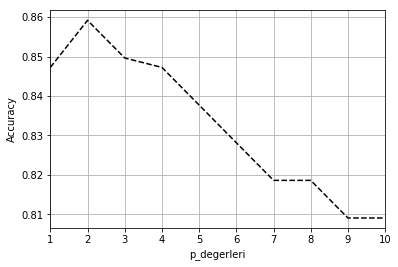

In [22]:
plt.plot(p_degerleri,p_accuracy,'k--')
plt.grid()
plt.ylabel('Accuracy')
plt.xlabel('p_degerleri')
plt.xlim(1, 10) 
plt.show()

In [21]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import itertools
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')


    plt.figure(figsize=(10,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    fig=plt.figure(figsize=(60,20))
 
    

In [23]:
clf = neighbors.KNeighborsClassifier(3, weights='distance',n_jobs=-1, p=2,metric='minkowski')
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)
acc = accuracy_score(y_test, y_hat)
 

In [26]:
acc
from sklearn.metrics import confusion_matrix

In [27]:
cm = confusion_matrix(y_test,y_hat)
cm

array([[  8,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 148,   0,   0,   0,   0,   2,   5,   0,   0,   0,   2,   0,
          0,   2,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   2,   5,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  2,   0,   1,   5,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   1,   0,   0,   7,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   2,   0,   0,   0,   0,  22,   3,   0,   0,   0,   1,   0,
          0,   0,   0,   0,   0,   0,   0,   

Confusion matrix, without normalization
Normalized confusion matrix


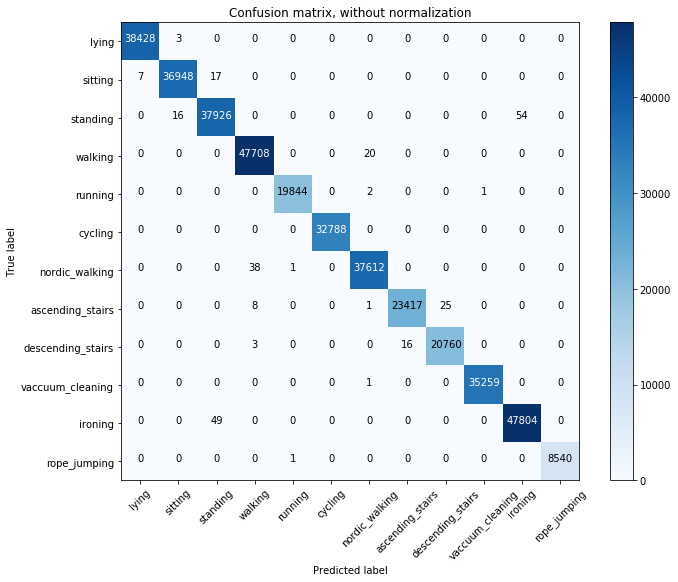

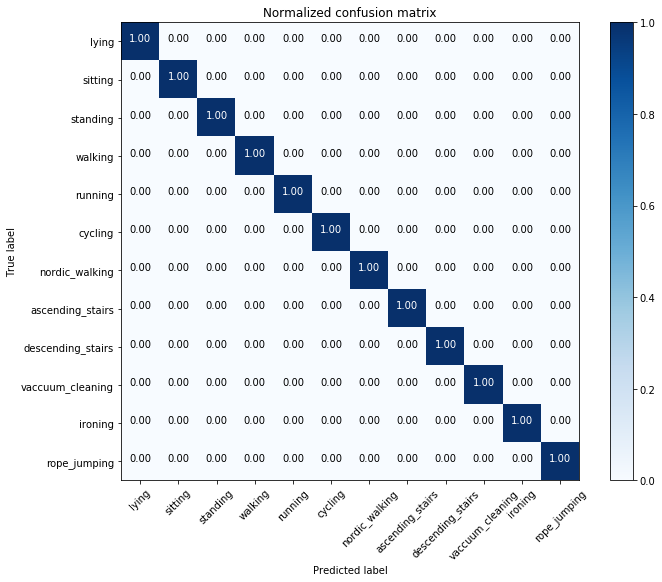

In [23]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_hat)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_labels,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_labels, normalize=True,
                      title='Normalized confusion matrix')

plt.show()